# **Sentiment Analysis Using NLTK**

['mayank', 'is', 'looking', 'like', 'a', 'pookie', 'at', 'coldplay', 'concert']
Counter({' loving': 2})
{'neg': 0.0, 'neu': 0.737, 'pos': 0.263, 'compound': 0.3612}
Positive Sentiment


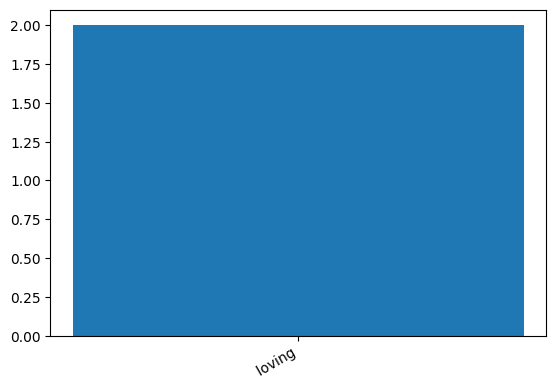

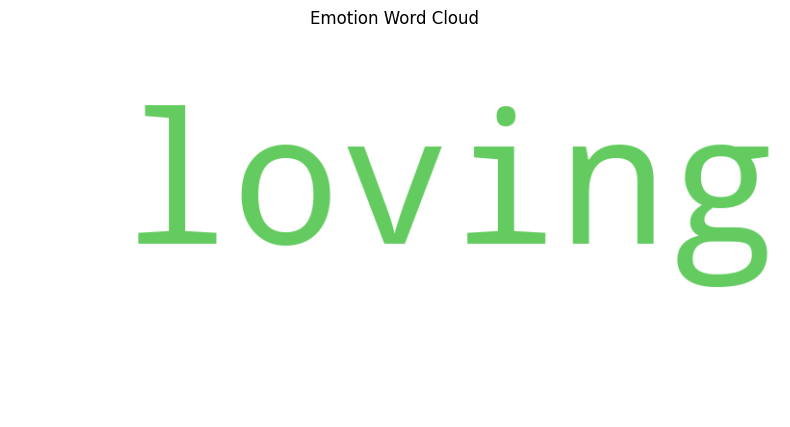

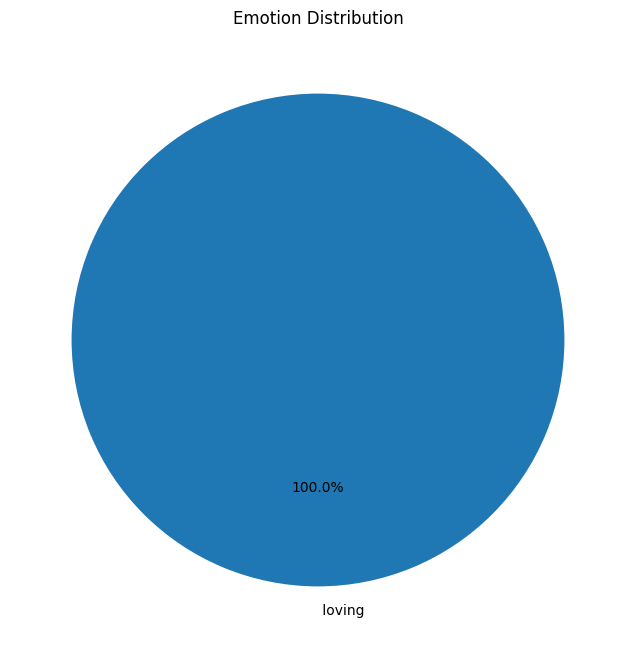

AI-based Sentiment (TextBlob): Neutral (Score: 0.00)


In [ ]:
# !pip install textblob==0.17.1
# nltk.download('punkt_tab')
# nltk.download('stopwords')
# nltk.download('vader_lexicon')

from textblob import TextBlob

def analyze_sentiment_with_textblob(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity  # Polarity ranges from -1 (negative) to 1 (positive)

    if sentiment > 0:
        return "Positive", sentiment
    elif sentiment < 0:
        return "Negative", sentiment
    else:
        return "Neutral", sentiment

import nltk
import string
from collections import Counter
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

text = open('/content/GenZ.txt', encoding='utf-8').read()
lower_case = text.lower()

cleaned_text = lower_case.translate(str.maketrans('','',string.punctuation))

tokenized_words = word_tokenize(cleaned_text, "english")
print(tokenized_words)

final_words = []
for word in tokenized_words:
    if word not in stopwords.words('english'):
        final_words.append(word)

emotions_list = []
with open('emotions.txt','r') as file:
      for line in file:
        clear_line = line.replace('\n', '').replace(",", '').replace("'", '').strip()
        if ':' in clear_line:
            word, emotion = clear_line.split(':')
            if word in final_words:
                emotions_list.append(emotion)


        if word in final_words:
            emotions_list.append(emotion)

emotion_count = Counter(emotions_list)
print(emotion_count)

negation_words = ["not", "never", "no", "none", "nobody", "nothing", "neither", "nowhere", "hardly", "scarcely", "seldom", "rarely", "cannot", "without", "least","barely"]

def sentiment_analyse(sentiment_text):
    score = SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
    print(score)
    neg = score['neg']
    pos = score['pos']

    # Check for negation before final words
    for i in range(len(final_words)):
      if final_words[i] in negation_words and i + 1 < len(final_words):
        if final_words[i + 1] in emotions_list:
          # Try to flip emotion to its antonym (requires expanded lexicon)
          # For now, just reduce intensity of sentiment in the presence of negation
          pos *= 0.5
          neg *= 0.5

    if neg > pos:
        print("Negative Sentiment")
    elif pos > neg:
        print("Positive Sentiment")
    else:
        print("Neutral Sentiment")

sentiment_analyse(cleaned_text)

fig, ax1 = plt.subplots()
ax1.bar(emotion_count.keys(), emotion_count.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(emotion_count)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Emotion Word Cloud')
plt.show()

plt.figure(figsize=(8, 8))  # Adjust figure size if needed
plt.pie(emotion_count.values(), labels=emotion_count.keys(), autopct='%1.1f%%', startangle=90)
plt.title('Emotion Distribution')
plt.show()


ai_sentiment, ai_score = analyze_sentiment_with_textblob(cleaned_text)
print(f"AI-based Sentiment (TextBlob): {ai_sentiment} (Score: {ai_score:.2f})")
